### Imports iniciais

In [2]:
%pip install matplotlib seaborn scikit-learn imbalanced-learn pandas numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

from imblearn.over_sampling import SMOTE

  Using cached matplotlib-3.10.3-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.7.0-cp311-cp311-win_amd64.whl.metadata (14 kB)
  Using cached imbalanced_learn-0.13.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached contourpy-1.3.2-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.2.1-cp311-cp311-win_amd64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached scipy-1.15.3-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached sklearn_compat-0.1.3-py3-none-any.whl.metadata (18 kB)
  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata (15 kB)
Usin

### Modelos

In [3]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout

### Adicionando a leitura do dataset

In [4]:
file_path = './dataset/student-mat.csv'
df = pd.read_csv(file_path, sep=';')

In [5]:
df['pass'] = (df['G3'] >= 10).astype(int)

### Processamento

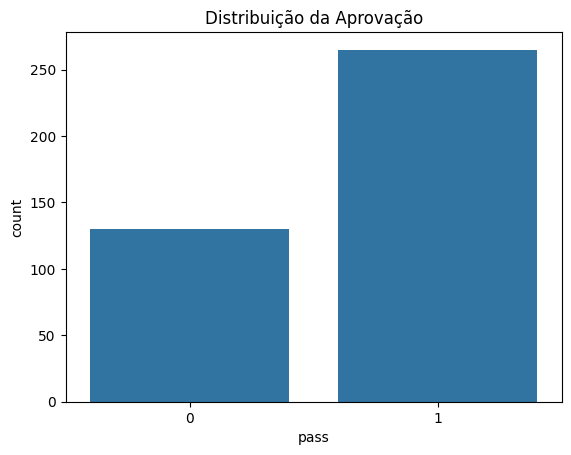

In [6]:
sns.countplot(data=df, x="pass")
plt.title("Distribuição da Aprovação")
plt.show()

cat_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

X = df.drop(['G1', 'G2', 'G3', 'pass'], axis=1)
y = df['pass']

df_cols = X.columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

### Treinamento e testes

In [7]:
# Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

### Modelagem da árvore de decisão

In [8]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Report:
              precision    recall  f1-score   support

           0       0.77      0.69      0.73        84
           1       0.69      0.77      0.73        75

    accuracy                           0.73       159
   macro avg       0.73      0.73      0.73       159
weighted avg       0.73      0.73      0.73       159



### Modelagem da Random Forest

In [9]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Report:
              precision    recall  f1-score   support

           0       0.86      0.67      0.75        84
           1       0.70      0.88      0.78        75

    accuracy                           0.77       159
   macro avg       0.78      0.77      0.77       159
weighted avg       0.79      0.77      0.77       159



### Modelagem rede neural

In [10]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

c:\Users\Jakarta\Downloads\student\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5526 - loss: 0.7119
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5421 - loss: 0.6933 
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5743 - loss: 0.6685 
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6130 - loss: 0.6608 
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6207 - loss: 0.6509 
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6320 - loss: 0.6403 
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6811 - loss: 0.6017 
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6274 - loss: 0.6268 
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6896 - loss: 0.5785 
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7267 - loss: 0.5664 
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7522 - loss: 0.5524 
Epoch 12/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0

### Avaliação

In [11]:
y_pred_nn_prob = model.predict(X_test)
y_pred_nn = (y_pred_nn_prob > 0.5).astype(int)

print("Rede Neural Report:")
print(classification_report(y_test, y_pred_nn))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Rede Neural Report:
              precision    recall  f1-score   support

           0       0.81      0.69      0.74        84
           1       0.70      0.81      0.75        75

    accuracy                           0.75       159
   macro avg       0.75      0.75      0.75       159
weighted avg       0.76      0.75      0.75       159



### Análise comparativa


Decision Tree AUC: 0.7319


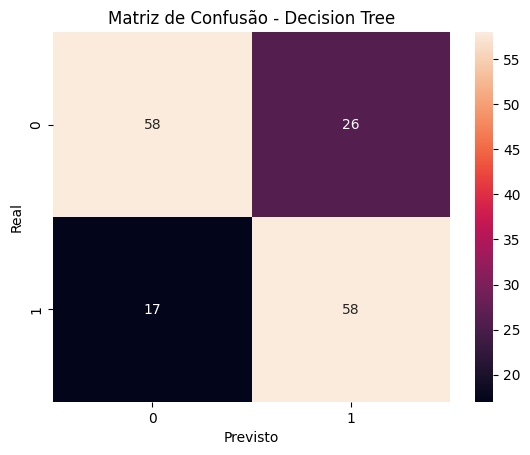


Random Forest AUC: 0.7733


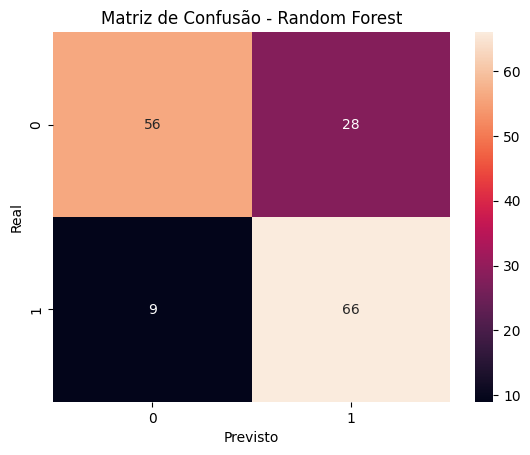


Neural Network AUC: 0.7519


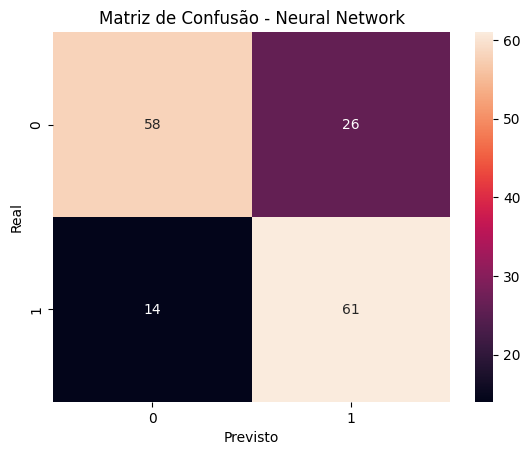

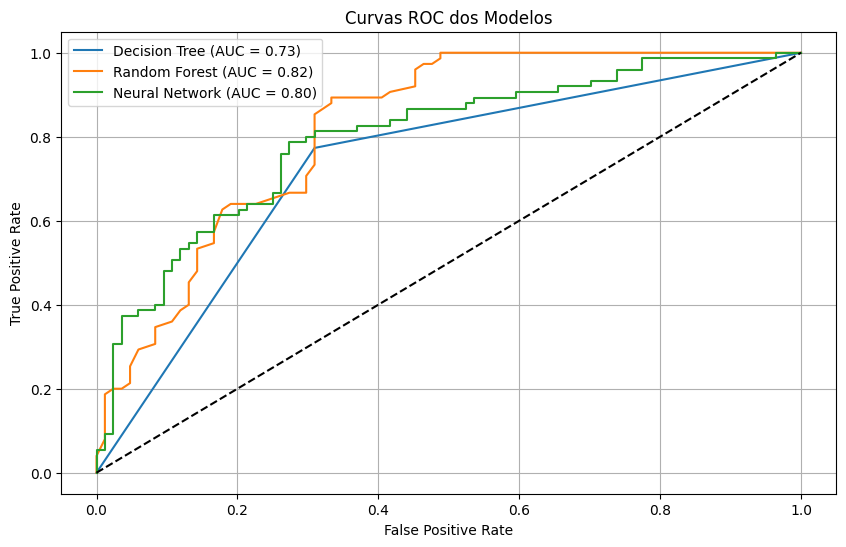

In [12]:
models = ['Decision Tree', 'Random Forest', 'Neural Network']
preds = [y_pred_dt, y_pred_rf, y_pred_nn]
probs = [dt.predict_proba(X_test)[:,1], rf.predict_proba(X_test)[:,1], y_pred_nn_prob.flatten()]

for model_name, pred in zip(models, preds):
    print(f"\n{model_name} AUC: {roc_auc_score(y_test, pred):.4f}")
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f"Matriz de Confusão - {model_name}")
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.show()

# Curvas ROC
plt.figure(figsize=(10, 6))
for model_name, probas in zip(models, probs):
    fpr, tpr, _ = roc_curve(y_test, probas)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_test, probas):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC dos Modelos')
plt.legend()
plt.grid()
plt.show()